# t-SNE

- 비선형 차원 축소 기법으로 고차원의 데이터를 국소 구조를 보존하면서 2차원 또는 3차원 시각화 하기 위해 주로 사용 
- 고차원의 경우에는 거리 기반의 유사도 (가우시안 분포를 이용한 계산)
- 저차원의 경우에는 확률적으로 비슷하게 재현(t-분포를 이용한 계산)
    - t-분포를 사용하는 이유는 멀리 떨어진 점간의 거리 차이를 완화 시키기 위한 방법

### 거리 계산 방식 
- 유클리드 거리 (euclidean) -> 기본적인 거리 방식 (직선 거리)
- 맨헤튼 거리 (manhattan) -> 직각 축 기반 거리 
- 체비쇼프 거리 (chebyshev) -> 최대의 축 차이 기반
- 코사인 거리 (cosine) -> 백터 방향 기반 
- 마할라노비스 거리(mahalanobis) -> 변수 간 상관 반영
- 해밍 거리 (hamming) -> 이진 데이터 전용 

- 매개변수 
    - n_components
        - 기본값 : 2
        - 축소할 차원의 개수
    - preplexity
        - 기본값 : 30
        - 이웃의 수 제어 (군집 크기 민감)
        - 보통 5 - 50정도의 값
        - 값이 작은 경우는 작은 구조, 큰 경우에는 전체 구조 
        - 일반적으로는 샘플의 개수 / 3 
        - 너무 큰 값을 생성하면 전체를 포괄하는 형태가 될수 있음
    - early_exggerarion
        - 기본값 : 12
        - 초기 학습에서 군집 간의 거리를 지정 (분리 촉진)
    - learning_rate
        - 기본값 : 'auto'
        - 학습의 속도 
        - 너무 작게 지정하면 수렴 느려짐 
        - 너무 크게 하는 경우에는 군집이 왜곡
        - 100~1000 정도의 값을 사용
    - max_iter
        - 기본값 : 1000
        - 전체 학습 반복 횟수
    - n_iter_without_progress
        - 기본값 : 300
        - 개선이 없을때 조기 종료 기준
    - init
        - 기본값 : 'pca'
        - 초기 좌표를 설정하는 방법 
        - random을 사용 시 좌표를 무작위로 선택 
    - metric
        - 기본값 : 'euclidean'
        - 거리 계산 방식 
    - method
        - 기본값 : 'barnes_hut'
        - 기본값을 사용시 빠른 속도로 계산
        - 'exact'는 정확하지만 시간은 증가 
    - angle
        - 기본값 : 0.5
        - barnes_hut 근사 정확도를 제어 
        - 작을수록 정확하고 느림
- 속성 
    - embedding_
        - 변환된 저차원 데이터 반환
    - kl_divergence_
        - 최종 KL 발산 값 반환(작을수록 원래의 구조와 유사)
- 메서드 
    - fit()
        - 데이터를 학습
    - transform()
        - 데이터를 저차원 변환 
    - fit_tansform()
        - 데이터를 학습하고 저차원 데이터로 변환

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
# 데이터셋 로드 
digits = load_digits()

In [ ]:
digits

In [ ]:
plt.figure(figsize=(5, 3))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray_r')
    plt.title(f'label : {digits.target[i]}')
    plt.axis('off')

plt.show()

In [ ]:
# 데이터를 스케일링 
X = StandardScaler().fit_transform(digits['data'])
Y = digits['target']

In [ ]:
# 차원 축소 class 생성
tsne = TSNE(
    n_components = 2, 
    perplexity = 40, 
    learning_rate = 'auto', 
    random_state = 42, 
    n_jobs = -1     # 멀티코어 전체 사용
)
X_tsne = tsne.fit_transform(X)

In [ ]:
X.shape

In [ ]:
# 64차원의 데이터를 2차원으로 변경하고 데이터의 분류를 그래프로 시각화
plt.figure(figsize=(14, 10))
sc = plt.scatter(X_tsne[:, 0], X_tsne[:,1], c = Y, 
                cmap='tab10', s = 40)
plt.legend(*sc.legend_elements(), title='Digit')
plt.show()

In [ ]:
print("KL divergence : ", round(tsne.kl_divergence_, 4))
print('Iteration : ', tsne.n_iter_)

In [ ]:
# PCA로 2차원 데이터 시각화 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 시각화 
plt.figure(figsize=(14, 10))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c = Y, 
                 cmap='tab10', s = 40)
plt.legend(*sc.legend_elements(), title='Digits')
plt.show()

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
# 반월 모양의 데이터셋을 생성 
X, Y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_std.shape

In [ ]:
# T_SNE을 적용해서 2차원 데이터로 구성
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, 
            random_state=42)
X_tsne = tsne.fit_transform(X_std)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = Y, cmap='coolwarm'
            , s = 50, alpha=0.6)

plt.colorbar(label='Class')
plt.show()

In [ ]:
# bodyPerfermance 데이터를 이용하여 tsne 차원축소 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

In [ ]:
body = pd.read_csv("../data/bodyPerformance.csv")

In [ ]:
# dtypes가 'object'인 컬럼을 모두 선택해서 LabelEncoder로 변환 

# dtypes가 'object'인 컬럼의 목록 확인 
obj_list = body.select_dtypes('object').columns.tolist()
obj_list

In [ ]:
for col in obj_list:
    le = LabelEncoder()
    body[col] = le.fit_transform(body[col].values)

body.head()

In [ ]:
# 고차원 데이터에서는 PCA를 통해서 차원 축소(30-50차원)를 1차적으로 진행 한뒤 
# t-SNE를 이용하여 2차 작업 -> t_SNE의 안정성과 속도 향상 
X = body.drop('class', axis=1).values
Y = body['class'].values
# X를 스케일링 
X_std = StandardScaler().fit_transform(X)

# PCA를 통해서 1차 차원 축소 
X_pca = PCA(
    n_components= min(30, X_std.shape[1]), 
    random_state=42
).fit_transform(X_std)


In [ ]:
X_pca.shape

In [ ]:
# t-SNE를 이용하여 2차 차원 축소 
tsne = TSNE(
    n_components=2, 
    perplexity=40, 
    random_state=42
)
X_tsne = tsne.fit_transform(X_pca)

In [ ]:
# 클래스를 기준으로 데이터를 시각화 
plt.figure(figsize=(14, 12))
sc = plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1], 
    c = Y, cmap='plasma', s=30, alpha=0.6
)
plt.legend(*sc.legend_elements(), title='Class')

plt.show()

In [ ]:
# 샘플 고차원 데이터를 생성
from sklearn.datasets import make_blobs

In [45]:
# 3개의 군집 데이터를 고차원 데이터로 생성 
X, Y = make_blobs(n_samples=1500, centers = 3, n_features=80, 
                  cluster_std=3, random_state=42)

In [46]:
X.shape

(1500, 80)

In [47]:
# 스케일링 작업 
X_std = StandardScaler().fit_transform(X)

In [48]:
import time

KL divergence : 1.8624
실행 시간 :  2.8738


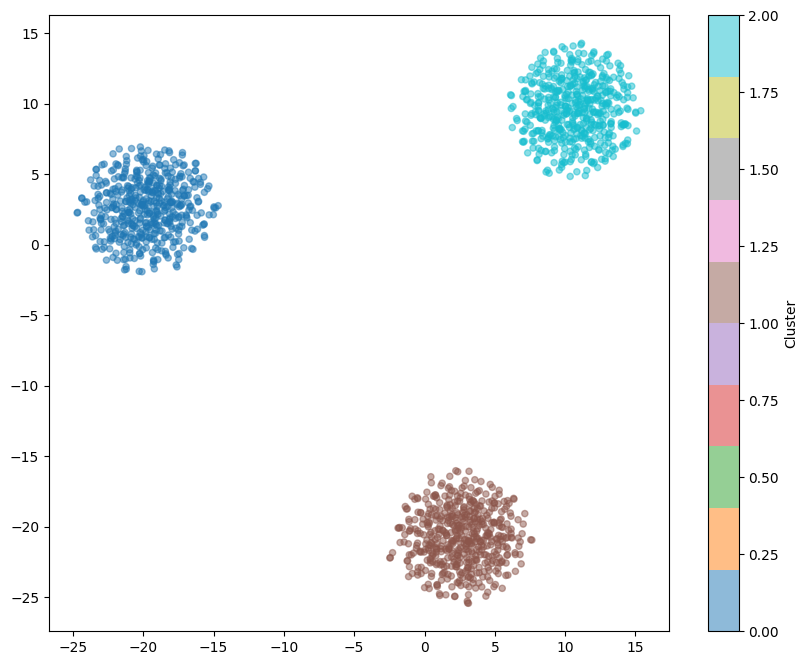

In [49]:
# 시작 시간을 입력 
start = time.time()
# t-SNE만을 사용해서 2차원 차원 축소 
tsne = TSNE(
    n_components=2, 
    perplexity=40, 
    random_state=42
)

X_tsne = tsne.fit_transform(X_std)
# 종료 시간을 입력 
end = time.time()
# KL_divergence 값 확인 -> 고차원과 저차원 확률 분포의 차이 (작을수록 좋음)
print("KL divergence :", round(tsne.kl_divergence_, 4))
# 총 실행 시간을 출력 
print('실행 시간 : ', round( (end - start), 4 ))

plt.figure(figsize=(10, 8))
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1], c = Y, cmap='tab10', s = 20, alpha=0.5
)
plt.colorbar(label='Cluster')
plt.show()



KL divergence : 1.7951
실행 시간 :  2.7663


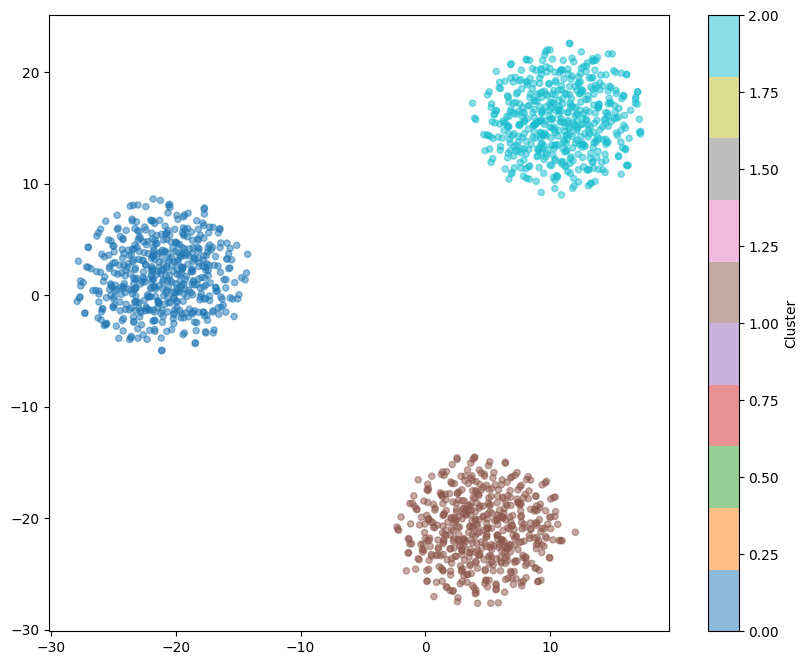

In [50]:
# 시작 시간을 입력 
start = time.time()

X_pca = PCA(
    n_components= min(30, X_std.shape[1]), 
    random_state=42
    ).fit_transform(X_std)

tsne = TSNE(
    n_components=2, 
    perplexity=40, 
    random_state=42
)
# pca를 이용한 차원 축소 데이터를 이용하여 tsne로 2차 차원 축소 진행
X_tsne = tsne.fit_transform(X_pca)
# 종료 시간은 입력 
end = time.time()
# KL_divergence 값 확인 -> 고차원과 저차원 확률 분포의 차이 (작을수록 좋음)
print("KL divergence :", round(tsne.kl_divergence_, 4))
# 총 실행 시간을 출력 
print('실행 시간 : ', round( (end - start), 4 ))

plt.figure(figsize=(10, 8))
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1], c = Y, cmap='tab10', s = 20, alpha=0.5
)
plt.colorbar(label='Cluster')
plt.show()

